In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from bpemb import BPEmb

In [2]:
DATA_DIR = "../data/"

filenames = [fname for fname in os.listdir(DATA_DIR) if fname.endswith(".csv")]

dfs = []

for f in filenames:
    # Read restaurant info
    file_num = int(f.split('.')[0].split('_')[-1])
    path = f"{DATA_DIR}/{f}"
    df = pd.read_csv(path, header=None, names=["date",'rating','title','review'])
    df["File"] = file_num 
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)
df

,date,rating,title,review,File
0,"September 27, 2019",30,Good steak,Restaurant has a great service yet the only ve...,57
1,"May 21, 2019",50,Great traditional food,They having a traditional spanish cooking meth...,57
2,"April 11, 2018",50,Must visit,Very good meat and service. The food very good...,57
3,"March 30, 2017",50,Was wonderful,"Thank you for all, my wife and me paid attenti...",57
4,"February 9, 2017",40,Friends dinner !!,Very cosy restaurant excellent service and ver...,57
...,...,...,...,...,...
38671,"July 25, 2016",40,Nice find,Enjoyed a decent dinner. Mozzarella and tomato...,63
38672,"July 22, 2016",40,Great staff,Friendly energetic staff. Good service. The fo...,63
38673,"June 19, 2016",40,Friendly and Efficient,We were just passing and this place was down a...,63
38674,"June 11, 2016",50,A great little find,"Lovely little restaurant, recently opened and ...",63


In [3]:
df["rating"]
df.groupby( by="rating").count()["date"] / 38676

rating
10                                                     0.013910
20                                                     0.016755
30                                                     0.054556
40                                                     0.217163
50                                                     0.663280
2018.0                                                 0.000310
2019.0                                                 0.000957
2020.0                                                 0.000621
 2014                                                  0.000181
 2015                                                  0.001086
 2016                                                  0.001603
 2017                                                  0.001164
 2018                                                  0.000750
 2019                                                  0.000595
 2020                                                  0.000103
 ask the bartender to make you a 

In [4]:
restaurants = pd.read_excel('../restaurant-list.xlsx', engine="openpyxl")
restaurants = restaurants.dropna(subset=["File"])
restaurants.File = restaurants.File.astype('int32')
restaurants

,File,website,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,reviews,type,Location
0,1,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1571.0,Steakhouse,NYC
1,2,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1035.0,Pizzeria,NYC
2,21,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,Pizzeria,NYC
3,22,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,Pizzeria,NYC
4,23,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,Pizzeria,NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,57,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,steakhouse,madrid
68,58,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,steakhouse,madrid
69,59,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,steakhouse,madrid
70,60,https://www.tripadvisor.com/Restaurant_Review-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,steakhouse,madrid


In [5]:
df = df.join(restaurants[["type","Location","File"]].set_index("File"), on="File").drop(columns=["File"])
df

,date,rating,title,review,type,Location
0,"September 27, 2019",30,Good steak,Restaurant has a great service yet the only ve...,steakhouse,madrid
1,"May 21, 2019",50,Great traditional food,They having a traditional spanish cooking meth...,steakhouse,madrid
2,"April 11, 2018",50,Must visit,Very good meat and service. The food very good...,steakhouse,madrid
3,"March 30, 2017",50,Was wonderful,"Thank you for all, my wife and me paid attenti...",steakhouse,madrid
4,"February 9, 2017",40,Friends dinner !!,Very cosy restaurant excellent service and ver...,steakhouse,madrid
...,...,...,...,...,...,...
38671,"July 25, 2016",40,Nice find,Enjoyed a decent dinner. Mozzarella and tomato...,Pizzeria,Roma
38672,"July 22, 2016",40,Great staff,Friendly energetic staff. Good service. The fo...,Pizzeria,Roma
38673,"June 19, 2016",40,Friendly and Efficient,We were just passing and this place was down a...,Pizzeria,Roma
38674,"June 11, 2016",50,A great little find,"Lovely little restaurant, recently opened and ...",Pizzeria,Roma


# EDA

In [6]:
num_words_fn = lambda x : len(x.split())

/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


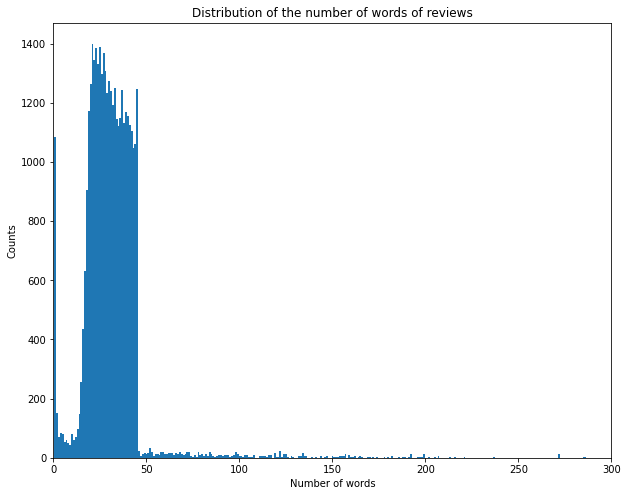

In [7]:
def make_histogram_descrete(values, dist_of_title=""):    
    bins = np.arange(0, max(values) + 1.5) - 0.5

    fig, ax = plt.subplots(figsize=(10,8))
    ax.hist(values, bins)

    ax.set_title(f"Distribution of {dist_of_title}")
    ax.set_xlabel("Number of words")
    ax.set_ylabel("Counts")
    return fig, ax

reviews_num_words = list(map(num_words_fn, df.review.values.astype(str)))

fig, ax = make_histogram_descrete(reviews_num_words, dist_of_title="the number of words of reviews")
ax.set_xlim([0,300])
fig.show()

/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


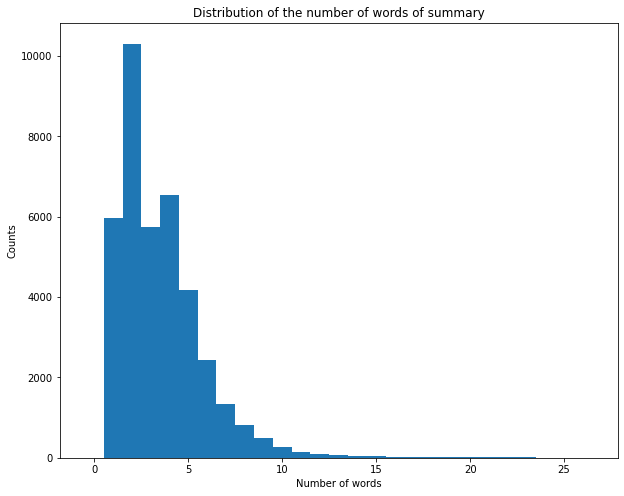

In [8]:
summary_num_words = list(map(num_words_fn, df.title.values.astype(str)))
fig, ax = make_histogram_descrete(summary_num_words, dist_of_title="the number of words of summary")
fig.show()

In [9]:
df.rating.value_counts()

50                                                     25653
40                                                      8399
30                                                      2110
20                                                       648
10                                                       538
 2016                                                     62
 2017                                                     45
 2015                                                     42
2019.0                                                    37
 2018                                                     29
2020.0                                                    24
 2019                                                     23
2018.0                                                    12
 2014                                                      7
 2020                                                      4
 ask the bartender to make you a DWT."""                   1
 good food and really di

# Data wrangling

In [18]:
lengths = df["review"].apply(lambda x : len(str(x).split()))
df[lengths<43]
df[df["review"].str.contains("More...")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [9]:
df[df["rating"] == ' good food and really diferrent styles of pizza."""']

,date,rating,title,review,type,Location
21931,"November 10, 2015,50,Really good!,""We took a c...",good food and really diferrent styles of pizz...,NaN,NaN,Pizzeria,SFC


In [10]:
df[df["rating"] == ' ask the bartender to make you a DWT."""']

,date,rating,title,review,type,Location
21351,"September 17, 2018,50,Excellent!,""Stopped in t...","ask the bartender to make you a DWT.""""""",NaN,NaN,Pizzeria,SFC


In [11]:
df[~df['rating'].isin([50,40,30,20,10])]

,date,rating,title,review,type,Location
20201,"December 18, 2020,40,Great Steak at Great pric...",NaN,NaN,NaN,Steakhouse,NYC
20202,;;,NaN,NaN,NaN,Steakhouse,NYC
20203,"November 23, 2020,30,All sizzle and no flavor,...",NaN,NaN,NaN,Steakhouse,NYC
20204,;;,NaN,NaN,NaN,Steakhouse,NYC
20205,"October 31, 2020,40,Birthday Dinner,""We celebr...",NaN,NaN,NaN,Steakhouse,NYC
...,...,...,...,...,...,...
22181,September 26,2014,40,Pricey but tasty,Pizzeria,SFC
22182,;,NaN,NaN,NaN,Pizzeria,SFC
22183,"September 23, 2014,50,Best Pizza I've Ever Had...",NaN,NaN,NaN,Pizzeria,SFC
22184,;,NaN,NaN,NaN,Pizzeria,SFC


In [12]:
df = df.drop_duplicates(ignore_index=True)
df

,date,rating,title,review,type,Location
0,"September 27, 2019",30,Good steak,Restaurant has a great service yet the only ve...,steakhouse,madrid
1,"May 21, 2019",50,Great traditional food,They having a traditional spanish cooking meth...,steakhouse,madrid
2,"April 11, 2018",50,Must visit,Very good meat and service. The food very good...,steakhouse,madrid
3,"March 30, 2017",50,Was wonderful,"Thank you for all, my wife and me paid attenti...",steakhouse,madrid
4,"February 9, 2017",40,Friends dinner !!,Very cosy restaurant excellent service and ver...,steakhouse,madrid
...,...,...,...,...,...,...
33887,"July 25, 2016",40,Nice find,Enjoyed a decent dinner. Mozzarella and tomato...,Pizzeria,Roma
33888,"July 22, 2016",40,Great staff,Friendly energetic staff. Good service. The fo...,Pizzeria,Roma
33889,"June 19, 2016",40,Friendly and Efficient,We were just passing and this place was down a...,Pizzeria,Roma
33890,"June 11, 2016",50,A great little find,"Lovely little restaurant, recently opened and ...",Pizzeria,Roma


In [13]:
df = df[df.rating.isin([50,40,30,20,10])].reset_index(drop=True)

df[["rating"]] = df[["rating"]].replace({
    50:"five stars", 
    40:"four starts", 
    30:"three stars", 
    20:"two stars", 
    10:"one star"
})
df

,date,rating,title,review,type,Location
0,"September 27, 2019",three stars,Good steak,Restaurant has a great service yet the only ve...,steakhouse,madrid
1,"May 21, 2019",five stars,Great traditional food,They having a traditional spanish cooking meth...,steakhouse,madrid
2,"April 11, 2018",five stars,Must visit,Very good meat and service. The food very good...,steakhouse,madrid
3,"March 30, 2017",five stars,Was wonderful,"Thank you for all, my wife and me paid attenti...",steakhouse,madrid
4,"February 9, 2017",four starts,Friends dinner !!,Very cosy restaurant excellent service and ver...,steakhouse,madrid
...,...,...,...,...,...,...
33230,"July 25, 2016",four starts,Nice find,Enjoyed a decent dinner. Mozzarella and tomato...,Pizzeria,Roma
33231,"July 22, 2016",four starts,Great staff,Friendly energetic staff. Good service. The fo...,Pizzeria,Roma
33232,"June 19, 2016",four starts,Friendly and Efficient,We were just passing and this place was down a...,Pizzeria,Roma
33233,"June 11, 2016",five stars,A great little find,"Lovely little restaurant, recently opened and ...",Pizzeria,Roma


In [39]:
train_data = pd.DataFrame(columns=["prefix", "input_text", "target_text"])
train_data["input_text"] = df['review']
train_data["target_text"] = df["title"]
train_data['prefix'] = "summarize"
train_data

,prefix,input_text,target_text
0,summarize,Restaurant has a great service yet the only ve...,Good steak
1,summarize,They having a traditional spanish cooking meth...,Great traditional food
2,summarize,Very good meat and service. The food very good...,Must visit
3,summarize,"Thank you for all, my wife and me paid attenti...",Was wonderful
4,summarize,Very cosy restaurant excellent service and ver...,Friends dinner !!
...,...,...,...
33230,summarize,Enjoyed a decent dinner. Mozzarella and tomato...,Nice find
33231,summarize,Friendly energetic staff. Good service. The fo...,Great staff
33232,summarize,We were just passing and this place was down a...,Friendly and Efficient
33233,summarize,"Lovely little restaurant, recently opened and ...",A great little find


In [40]:
rating_df = pd.DataFrame(columns=["prefix", "input_text", "target_text"])
rating_df["input_text"] = df['review']
rating_df["target_text"] = df["rating"]
rating_df['prefix'] = "rate"
rating_df

,prefix,input_text,target_text
0,rate,Restaurant has a great service yet the only ve...,three stars
1,rate,They having a traditional spanish cooking meth...,five stars
2,rate,Very good meat and service. The food very good...,five stars
3,rate,"Thank you for all, my wife and me paid attenti...",five stars
4,rate,Very cosy restaurant excellent service and ver...,four starts
...,...,...,...
33230,rate,Enjoyed a decent dinner. Mozzarella and tomato...,four starts
33231,rate,Friendly energetic staff. Good service. The fo...,four starts
33232,rate,We were just passing and this place was down a...,four starts
33233,rate,"Lovely little restaurant, recently opened and ...",five stars


In [41]:
dataset = train_data.append(rating_df, ignore_index=True)
dataset.to_csv("../datasets/t5_dataset.csv")

In [49]:
shuffled = dataset.sample(frac=1, random_state=42)

train_samples = int(len(shuffled) * 0.8)

print(f"Train samples: {train_samples}")
print(f"Eval samples: {len(shuffled) - train_samples}")

train_df = shuffled.iloc[:train_samples,:]
eval_df = shuffled.iloc[train_samples:,:]

Train samples: 53176
Eval samples: 13294


# Data pipeline

In [14]:
MAX_LENGTH = 300

def prepare_embeddings(vocab_size, embedding_dim, trainable):
    bpemb_en = BPEmb(lang="en", vs=vocab_size, dim=embedding_dim)
    
    embedding_layer = tf.keras.layers.Embedding(
        input_dim = bpemb_en.vectors.shape[0],
        output_dim = bpemb_en.vectors.shape[1],
        input_length = MAX_LENGTH,
        embeddings_initializer = tf.keras.initializers.Constant(bpemb_en.vectors),
        trainable=trainable
    )
    
    return bpemb_en, embedding_layer


bpemb, embedding_layer = prepare_embeddings(25000, 300, False)

In [15]:
for idx in np.random.choice(range(df.shape[0]), size=3):
    print("SUMMARY")
    summary = df.title.values[idx] + " Rating: " + str(df.rating.values[idx]) 
    print(summary)
    print(bpemb.encode_with_eos(summary))
    print('REVIEW')
    review = df.review.values[idx] 
    print(review)
    print(bpemb.encode_with_eos(review))
    print()

SUMMARY
Great steak Rating: five stars
['▁great', '▁ste', 'ak', '▁rating', ':', '▁five', '▁stars', '</s>']
REVIEW
Turned up without a reservation and we were very warmly greeted, the staff were very accommodating and the restaurant is very nicely decorated. We both had the rib eye which was excellent, would definitely return.
['▁turned', '▁up', '▁without', '▁a', '▁reservation', '▁and', '▁we', '▁were', '▁very', '▁warm', 'ly', '▁greeted', ',', '▁the', '▁staff', '▁were', '▁very', '▁accommod', 'ating', '▁and', '▁the', '▁restaurant', '▁is', '▁very', '▁nic', 'ely', '▁decorated', '.', '▁we', '▁both', '▁had', '▁the', '▁rib', '▁eye', '▁which', '▁was', '▁excellent', ',', '▁would', '▁definitely', '▁return', '.', '</s>']

SUMMARY
Enjoyable Rating: four starts
['▁enjoy', 'able', '▁rating', ':', '▁four', '▁starts', '</s>']
REVIEW
Two visits here already and the food was always good. Pasta dishes are really good, service is ok. I don’t like that it’s in old town but that’s a a personal thing.
['▁two'

In [16]:
def encode_clousure(bpemb=bpemb, SEP=0):
    def encode_fn(text, summary, rating):
        text_ids = bpemb.encode_ids_with_eos(text) + [SEP] # Add padding token
        # Encode without eos beacuse will be concatenated later with rating
        summary_ids = bpemb.encode_ids(summary)
        # Encode ratings with eos 
        rating_ids =  bpemb.encode_ids_with_eos(f". Rating: {rating}")
        whole_summary = summary_ids + rating_ids
        joint = text_ids + whole_summary 
        mask = [0] * len(text_ids) + [1] * len(summary_ids) + [1.5] * len(rating_ids)
        return joint, joint, mask
    return encode_fn
    
encode_fn = encode_clousure(bpemb)
sample_inputs = df[["review", "title", "rating"]].values[0]
input_ids, target_ids, mask = encode_fn(*sample_inputs)
print(f"Input_ids:\n{input_ids}")
print()
print(f"Decoded inputs ids:\n{bpemb.decode_ids(input_ids)}")
print()
print(f"Mask:\n{mask}")

Input_ids:
[7213, 261, 4, 954, 1114, 3431, 7, 491, 1214, 1515, 9720, 80, 7, 2671, 1418, 6, 1020, 166, 1220, 4332, 71, 4, 2040, 5090, 1546, 97, 7, 1020, 166, 24935, 326, 18552, 5447, 1113, 24935, 107, 80, 4, 1088, 42, 6122, 120, 1020, 166, 24935, 120, 24920, 107, 24935, 2, 0, 1515, 1020, 166, 896, 7288, 24948, 607, 3534, 2]

Decoded inputs ids:
restaurant has a great service yet the only very good dish is the sirloin steak you cook on a hot plate served with the steak. they hardly speak english. it is a place to eat that steak. thats it. ⁇  good steak . rating: three stars

Mask:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]


In [17]:
def tf_encode(text, summary, rating):
    text = tf.convert_to_tensor(text), 
    summary = tf.convert_to_tensor(summary)
    rating = tf.convert_to_tensor(rating)
    input_ids, target_ids, mask = tf.py_function(encode_fn, [text, summary, rating], 
                                                 [tf.int64, tf.int64, tf.int64])
    for result in [input_ids, target_ids, mask]:
            result.set_shape([None])
    return input_ids, target_ids, mask

tf_encode(*sample_inputs)

UnknownError: AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'lower'
Traceback (most recent call last):

  File "/home/sebastian/anaconda3/envs/trip-adv/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 247, in __call__
    return func(device, token, args)

  File "/home/sebastian/anaconda3/envs/trip-adv/lib/python3.7/site-packages/tensorflow/python/ops/script_ops.py", line 135, in __call__
    ret = self._func(*args)

  File "/home/sebastian/anaconda3/envs/trip-adv/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "<ipython-input-16-a761b5b1d1ad>", line 3, in encode_fn
    text_ids = bpemb.encode_ids_with_eos(text) + [SEP] # Add padding token

  File "/home/sebastian/anaconda3/envs/trip-adv/lib/python3.7/site-packages/bpemb/bpemb.py", line 314, in encode_ids_with_eos
    lambda t: self.spm.EncodeAsIds(t) + [self.EOS])

  File "/home/sebastian/anaconda3/envs/trip-adv/lib/python3.7/site-packages/bpemb/bpemb.py", line 366, in _encode
    return list(map(fn, texts))

  File "/home/sebastian/anaconda3/envs/trip-adv/lib/python3.7/site-packages/bpemb/bpemb.py", line 448, in preprocess
    return re.sub(r"\d", "0", text.lower())

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'lower'

 [Op:EagerPyFunc]